Accuracy:  79.6875
Report               precision    recall  f1-score   support

           0       0.81      0.92      0.86       130
           1       0.77      0.53      0.63        62

    accuracy                           0.80       192
   macro avg       0.79      0.73      0.74       192
weighted avg       0.79      0.80      0.79       192

Confusion Matrix [[120  10]
 [ 29  33]]


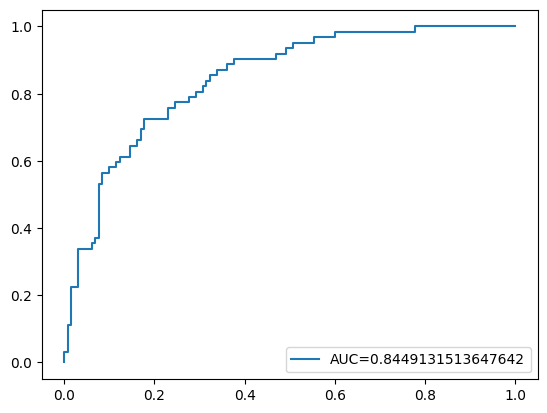

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#dataset load
data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\diabetes.csv')
#data preparation
x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#model creation
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, random_state=0)
#model training
model.fit(x_train, y_train)
#predict
y_pred = model.predict(x_test)
#evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy * 100)

report = metrics.classification_report(y_test, y_pred)
print('Report', report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix', matrix)

y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={str(auc)}")
plt.legend(loc=4)
plt.show()